##### Part 1: K-Means Clustering

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

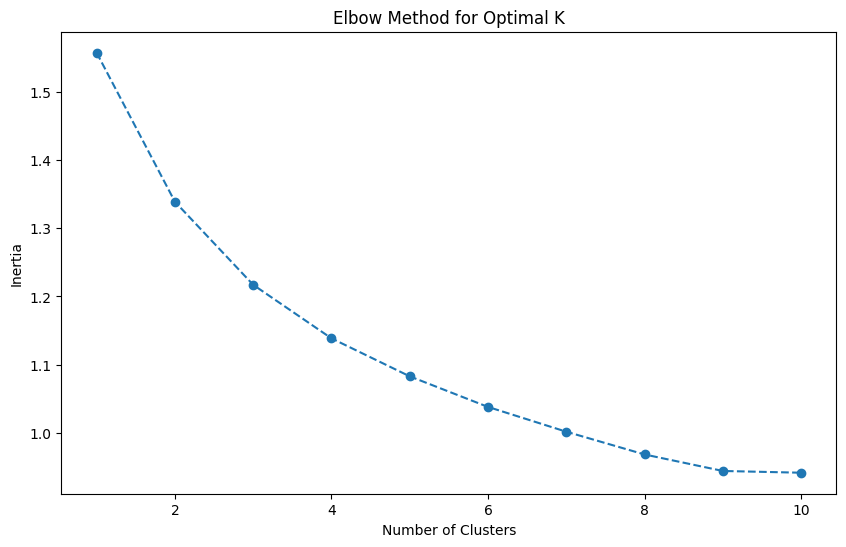

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load embedded data from CSV file
embedded_data = pd.read_csv("word2vec_vectorized_300.csv")

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedded_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow curve, select the optimal number of clusters and perform K-Means clustering
optimal_k = 4  # Adjust this based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(embedded_data)

# Add cluster labels to the embedded data
embedded_data_with_labels = embedded_data.copy()
embedded_data_with_labels['Cluster'] = cluster_labels

# Save the clustered data to a new CSV file
embedded_data_with_labels.to_csv("clustered_word2vec_300.csv", index=False)


##### Part 2: Visualization of Clustered Data

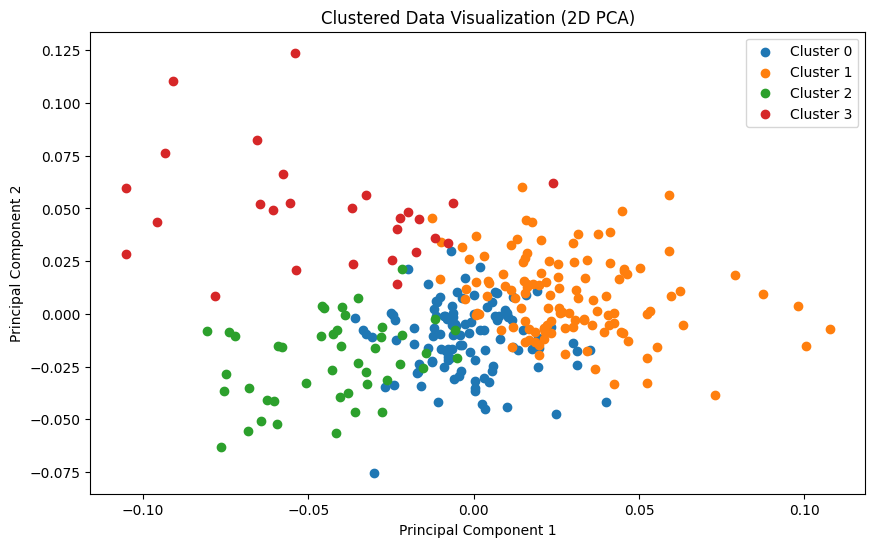

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load clustered data from CSV file
clustered_data = pd.read_csv("clustered_word2vec_300.csv")

# Extract embedded features
embedded_features = clustered_data.drop(columns=['Cluster'])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
embedded_2d = pca.fit_transform(embedded_features)

# Add cluster labels to the reduced data
embedded_2d_with_labels = pd.DataFrame(embedded_2d, columns=['PC1', 'PC2'])
embedded_2d_with_labels['Cluster'] = clustered_data['Cluster']

# Plot clustered data
plt.figure(figsize=(10, 6))
for cluster_label in clustered_data['Cluster'].unique():
    cluster_data = embedded_2d_with_labels[embedded_2d_with_labels['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')
plt.title('Clustered Data Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


##### Part 3: Hierarchical Clustering

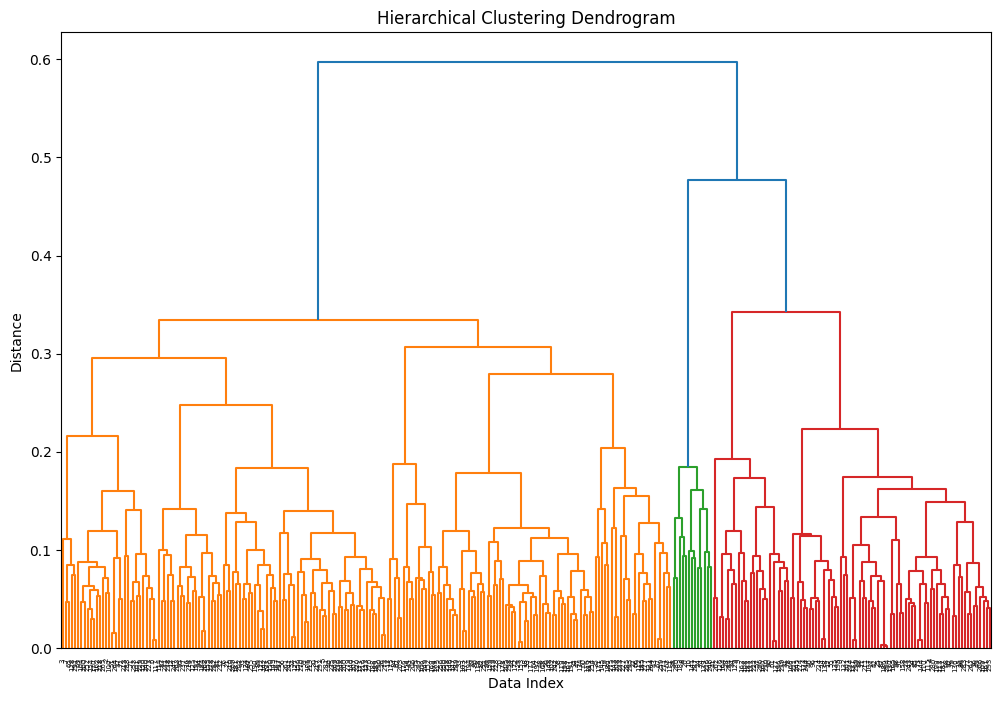

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load embedded data from CSV file
embedded_data = pd.read_csv("word2vec_vectorized_300.csv")

# Perform hierarchical clustering
# You may need to adjust the parameters (e.g., linkage method, distance metric) based on your data
linkage_matrix = linkage(embedded_data, method='ward', metric='euclidean')

# Plot dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, determine the optimal number of clusters
# You can use visual inspection or a cut-off threshold to select the number of clusters

# Perform Agglomerative Hierarchical Clustering with the optimal number of clusters
optimal_num_clusters = 4  # Adjust based on dendrogram visualization or other criteria
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_num_clusters, linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(embedded_data)

# Add cluster labels to the embedded data
embedded_data_with_labels = embedded_data.copy()
embedded_data_with_labels['Cluster'] = cluster_labels

# Save the clustered data to a new CSV file
embedded_data_with_labels.to_csv("hierarchical_clustered_word2vec_300.csv", index=False)


##### Re-Assign Clusters to News Stories

In [7]:
import pandas as pd

def read_clustered_data(clustered_file_path, tokenized_data_path):
    # Load clustered data
    clustered_data = pd.read_csv(clustered_file_path)

    # Read tokenized data
    with open(tokenized_data_path, 'r') as file:
        tokenized_data = [line.strip('"') for line in file.readlines()]

    # Map clusters to original text data
    merged_data = pd.concat([clustered_data, pd.DataFrame(tokenized_data, columns=['text'])], axis=1)

    # Group data by cluster label
    grouped_data = merged_data.groupby('Cluster')

    # Iterate over groups and access member stories
    for cluster_label, cluster_group in grouped_data:
        # Save clustered stories to individual files
        cluster_file_name = f"cluster_{cluster_label}.txt"
        cluster_group['text'].to_csv(cluster_file_name, index=False)
        print(f"Cluster {cluster_label} stories saved to {cluster_file_name}")

# Example usage
clustered_file_path = 'clustered_word2vec_300.csv'  # Update with your file path
tokenized_data_path = 'tokenized_300.json'  # Update with your tokenized data file path
read_clustered_data(clustered_file_path, tokenized_data_path)


Cluster 0.0 stories saved to cluster_0.0.txt
Cluster 1.0 stories saved to cluster_1.0.txt
Cluster 2.0 stories saved to cluster_2.0.txt
Cluster 3.0 stories saved to cluster_3.0.txt
